# Decision Trees And Random Forests - Example Project

In this Lecture we will be going over Decision Trees and Random Forests. In order for you to understand this lecture completely there is some required reading. First read this <a href="https://towardsdatascience.com/enchanted-random-forest-b08d418cb411" target="_blank">blog post</a> here.

After reading the blog post you should have a basic layman's (or laywoman!) understanding of how decision trees and random forests work. Lets see how we can implement them in Python!

In [1]:
#Imports
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

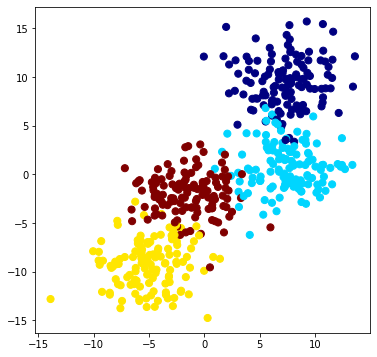

In [2]:
from sklearn.datasets import make_blobs

X,y = make_blobs(n_samples=500,centers=4,random_state=8,cluster_std=2.4)

plt.figure(figsize=(6,6))
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='jet')

In [3]:
from sklearn.tree import DecisionTreeClassifier

##  Visualisation Function

In [4]:
def visualize_tree(classifier, X, y, boundaries=True,xlim=None, ylim=None):
    '''
    Visualizes a Decision Tree. 
    INPUTS: Classifier Model, X, y, optional x/y limits.
    OUTPUTS: Meshgrid visualization for boundaries of the Decision Tree
    '''
     
    # Fit the X and y data to the tree
    classifier.fit(X, y)

    
    # Automatically set the x and y limits to the data (+/- 0.1)
    if xlim is None:
        xlim = (X[:, 0].min() - 0.1, X[:, 0].max() + 0.1)
    if ylim is None:
        ylim = (X[:, 1].min() - 0.1, X[:, 1].max() + 0.1)

    # Assign the variables
    x_min, x_max = xlim
    y_min, y_max = ylim
    
    
    # Create a mesh grid
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    
    # Define the Z by the predictions (this will color in the mesh grid)
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])

    # Reshape based on meshgrid
    Z = Z.reshape(xx.shape)
    
    # Plot the figure (use)
    plt.figure(figsize=(10,10))
    plt.pcolormesh(xx, yy, Z, alpha=0.2, cmap='jet')
    

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='jet')
    
    #Set Limits
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)        
    
    def plot_boundaries(i, xlim, ylim):
        '''
        Plots the Decision Boundaries
        '''
        if i < 0:
            return

        # Shorter variable name
        tree = classifier.tree_
        
        # Recursively go through nodes of tree to plot boundaries.
        if tree.feature[i] == 0:
            plt.plot([tree.threshold[i], tree.threshold[i]], ylim, '-k')
            plot_boundaries(tree.children_left[i],
                            [xlim[0], tree.threshold[i]], ylim)
            plot_boundaries(tree.children_right[i],
                            [tree.threshold[i], xlim[1]], ylim)
        
        elif tree.feature[i] == 1:
            plt.plot(xlim, [tree.threshold[i], tree.threshold[i]], '-k')
            plot_boundaries(tree.children_left[i], xlim,
                            [ylim[0], tree.threshold[i]])
            plot_boundaries(tree.children_right[i], xlim,
                            [tree.threshold[i], ylim[1]])
    
    # Random Forest vs Single Tree
    if boundaries:
        plot_boundaries(0, plt.xlim(), plt.ylim())

<ipython-input-4-871ba2f89980>:35: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, alpha=0.2, cmap='jet')


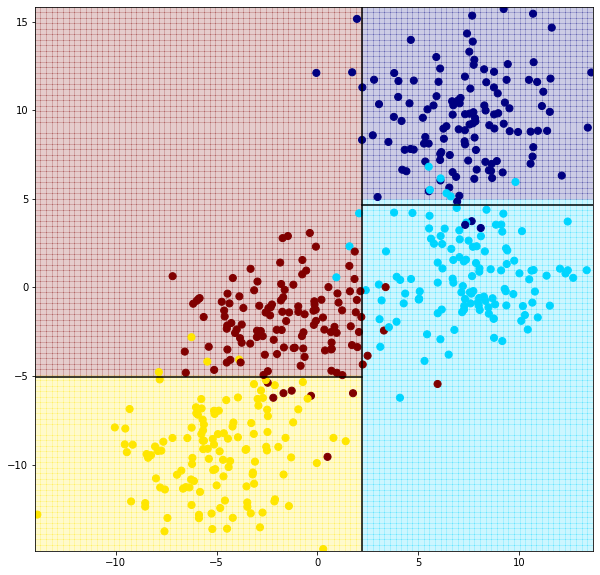

In [9]:
clf = DecisionTreeClassifier(max_depth=2,random_state=0)

visualize_tree(clf,X,y)

<ipython-input-4-871ba2f89980>:35: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, alpha=0.2, cmap='jet')


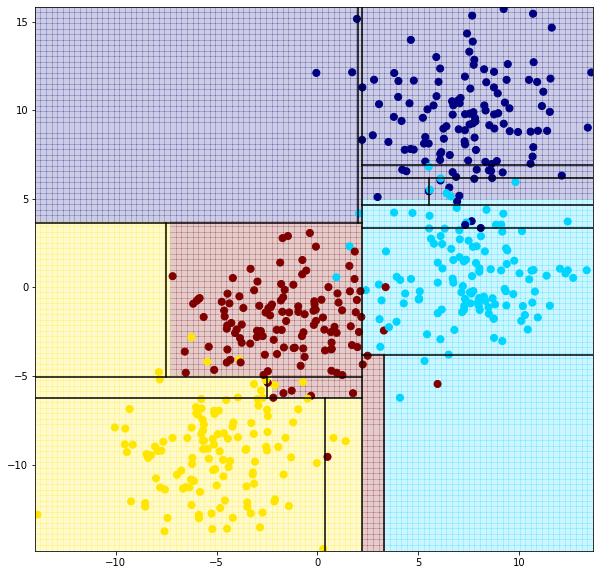

In [10]:
clf = DecisionTreeClassifier(max_depth=4,random_state=0)

visualize_tree(clf,X,y)

Notice how changing the depth of the decision causes the boundaries to change substantially! If we pay close attention to the second model we can begin to see evidence of <a href="http://www.saedsayad.com/decision_tree_overfitting.htm" target="_blank">over-fitting</a>. This basically means that if we were to try to predict a new point the result would be influenced more by the noise than the signal.

So how do we address this issue? The answer is by creating an ensemble of decision trees.

## Random Forests 

Ensemble Methods essentially average the results of many individual estimators which over-fit the data. The resulting estimates are much more robust and accurate than the individual estimates which make them up! One of the most common ensemble methods is the Random Forest, in which the ensemble is made up of many decision trees which are in some way perturbed. Lets see how we can use Sci-Kit Learn to create a random forest (its actually very simple!)

Note that n_estimators stands for the numerb of trees to use. You would intuitively know that using more decision trees would be better, but after a certain amount of trees (somewhere between 100-400 depending on your data) the benefits in accuracy of adding more estimators significantly decreases and just becomes a load on your CPU.

<ipython-input-4-871ba2f89980>:35: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, alpha=0.2, cmap='jet')


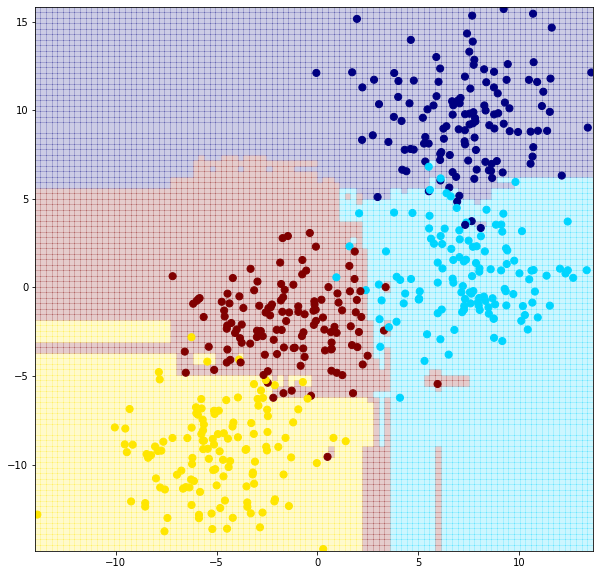

In [11]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100,random_state=0)

visualize_tree(clf,X,y,boundaries=False)

In [14]:
x = 10 * np.random.rand(100)

In [15]:
x

array([4.20172022, 6.68215201, 9.18043833, 9.25663441, 5.75501392,
       0.2665516 , 0.36052375, 7.23137424, 1.76615175, 2.9418466 ,
       0.81075693, 3.16207569, 7.51083324, 5.4896306 , 9.80591486,
       2.13619297, 7.75389151, 1.22497557, 6.51702998, 8.82773619,
       7.54248956, 2.39818402, 3.29538557, 1.92521409, 5.97950974,
       0.35609637, 3.25670583, 2.20353882, 4.661288  , 5.21095718,
       8.19837372, 8.26848919, 3.09027356, 5.87958333, 2.02742283,
       0.98071917, 4.52272168, 9.13844645, 3.16818159, 2.29441559,
       1.75728322, 7.55410927, 9.35837396, 6.39864734, 1.29048267,
       9.02273946, 1.95409042, 9.03291973, 0.79866018, 8.81131285,
       5.33951769, 3.98737072, 8.30761034, 3.71134587, 5.50033697,
       4.59888475, 4.44385554, 4.31909304, 9.30220765, 5.47501535,
       3.47670207, 9.30200581, 2.98719416, 6.30533566, 1.92280621,
       6.29949159, 8.34190881, 1.62365719, 6.01476482, 0.70627221,
       8.85817672, 8.50053284, 5.65827602, 0.57997399, 7.69016

In [16]:
def sin_model(x,sigma=0.2):
    
    noise = sigma * np.random.rand(len(x))
    
    return np.sin(5*x) + np.sin(0.5 * x) + noise

In [17]:
y = sin_model(x)

<ErrorbarContainer object of 3 artists>

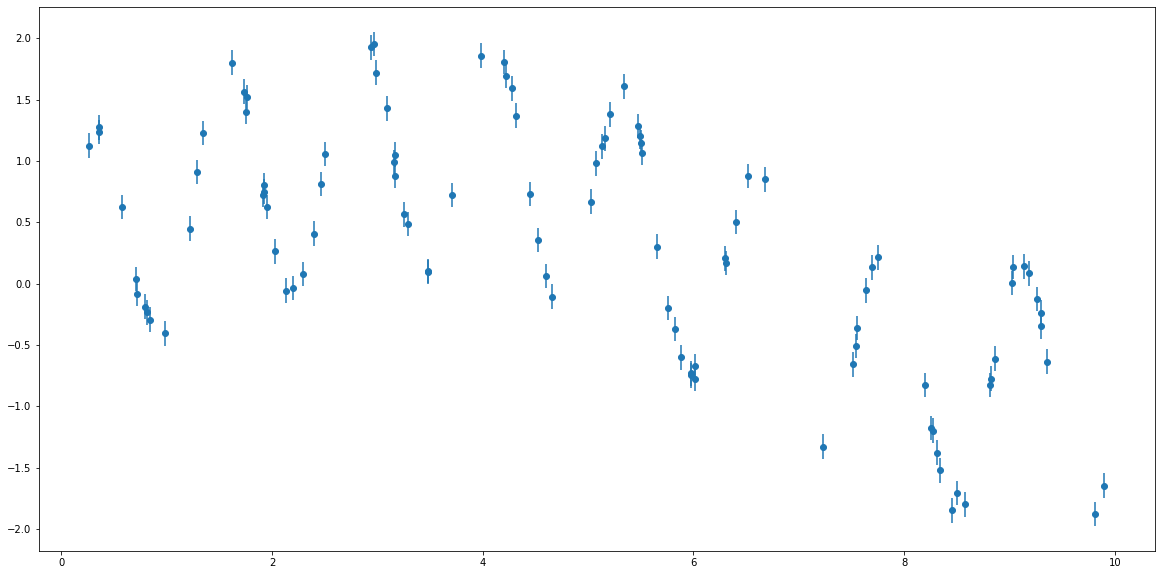

In [29]:
plt.figure(figsize=(20,10))
plt.errorbar(x,y,0.1,fmt='o')

In [30]:
from sklearn.ensemble import RandomForestRegressor

xfit = np.linspace(0,10,1000)


In [31]:
rfr = RandomForestRegressor(100)

rfr.fit(x[:,None],y)

yfit = rfr.predict(xfit[:,None])


In [32]:
ytrue = sin_model(xfit,0)

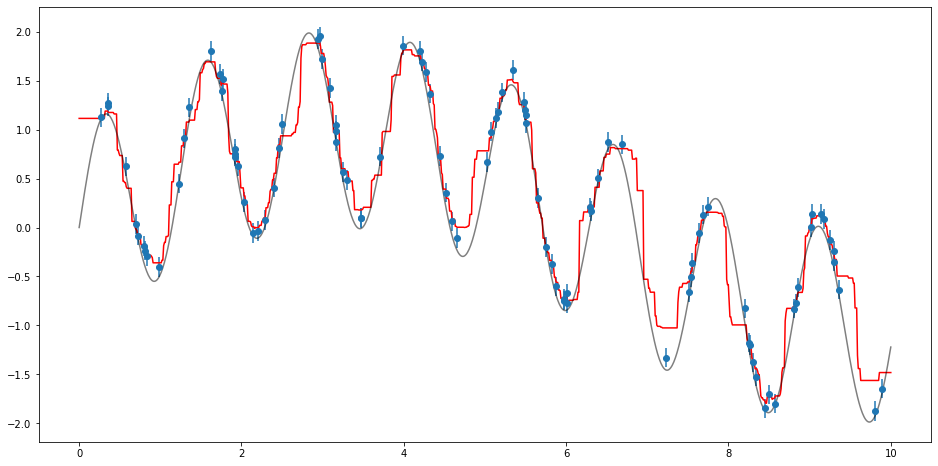

In [34]:
plt.figure(figsize=(16,8))

plt.errorbar(x,y,0.1,fmt='o')

plt.plot(xfit,yfit, '-r')

plt.plot(xfit,ytrue, '-k', alpha=0.5)